# CAPTCHA RECOGNITION

## Importing Neccessary Libraries

In [31]:
import numpy as np
import cv2
import pathlib
import os
import PIL.Image as Image
import matplotlib.pylab as plt
import tensorflow as tf
import tensorflow_hub as hub
import string

from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers,regularizers,optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator


import warnings
warnings.filterwarnings(action='ignore')

## Loading and Reading Data

In [32]:
data_dir = pathlib.Path(r'C:\Users\Samarpit Kandhari\Desktop\HP\MATERIAL\Deep_Learning\5_captcha\project\captcha_dataset\samples')
data_dir

WindowsPath('C:/Users/Samarpit Kandhari/Desktop/HP/MATERIAL/Deep_Learning/5_captcha/project/captcha_dataset/samples')

(50, 200, 3)


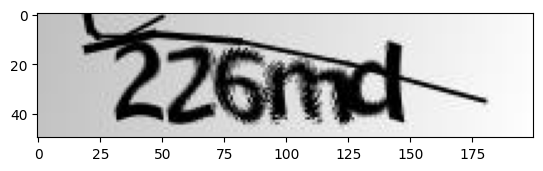

In [33]:
data=list(data_dir.glob('*'))
img=cv2.imread(str(data[0]))
print(img.shape)
plt.imshow(img)

In [34]:
data[:5]

[WindowsPath('C:/Users/Samarpit Kandhari/Desktop/HP/MATERIAL/Deep_Learning/5_captcha/project/captcha_dataset/samples/226md.png'),
 WindowsPath('C:/Users/Samarpit Kandhari/Desktop/HP/MATERIAL/Deep_Learning/5_captcha/project/captcha_dataset/samples/22d5n.png'),
 WindowsPath('C:/Users/Samarpit Kandhari/Desktop/HP/MATERIAL/Deep_Learning/5_captcha/project/captcha_dataset/samples/2356g.png'),
 WindowsPath('C:/Users/Samarpit Kandhari/Desktop/HP/MATERIAL/Deep_Learning/5_captcha/project/captcha_dataset/samples/23mdg.png'),
 WindowsPath('C:/Users/Samarpit Kandhari/Desktop/HP/MATERIAL/Deep_Learning/5_captcha/project/captcha_dataset/samples/23n88.png')]

In [35]:
from PIL import Image
labels = []
images = []

In [36]:
#Importing Images from File-List
for image_path in data:
    image = Image.open(image_path)
    image = image.convert('RGB') #Removing Transparency Channel from PNG(To match dimensions with some JPG images)
    image=np.reshape(image,(50,200,3))
    image = np.array(image)
    image = image/255 #Normalization
    
    image_label = str(image_path).split("\\")[-1].split(".")[0]
    
    if len(image_label)==5:
        images.append(image)
        labels.append(image_label)
    else:
        print(image_label)

3bnfnd


In [7]:
images = np.stack(images)
print(images.shape)

(1069, 50, 200, 3)


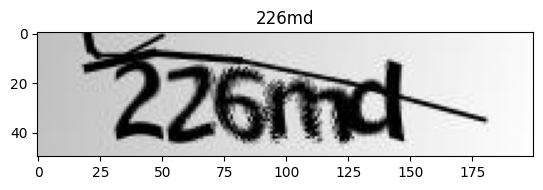

In [8]:
plt.imshow(images[0])
plt.title(labels[0])
plt.axis('on') 
plt.show()

#print(images[0])

In [9]:
characters= string.ascii_lowercase + "0123456789" # All symbols captcha can contain
nchar=len(characters)
one_hot_encoded=[]
for pic in labels:
    target=np.zeros((5,nchar))
    for j,k in enumerate(pic):
        index=characters.find(k)
        target[j,index]=1
    one_hot_encoded.append(target)

In [10]:
labels=np.array(one_hot_encoded)
labels[0]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.]])

In [11]:
train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size=0.1, random_state=42, shuffle=True)

In [12]:
train_images.shape, test_images.shape, train_labels.shape, test_labels.shape

((962, 50, 200, 3), (107, 50, 200, 3), (962, 5, 36), (107, 5, 36))

In [13]:
augmented_layer=Sequential([
    layers.RandomRotation(0.1,input_shape=(50, 200, 3)),
    layers.RandomZoom(0.1)
])

In [101]:
model = Sequential([
    # augmented_layer,
    layers.Conv2D(32, (3, 3), activation='relu',input_shape=(50,200,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.BatchNormalization(),

    layers.Flatten(),
    layers.Dense(524, activation='relu',kernel_regularizer=regularizers.l2(0.01),use_bias=True),
    layers.Dropout(0.3),
    layers.Dense(5 * 36, activation='softmax',kernel_regularizer=regularizers.l2(0.01),use_bias=True), 

    layers.Reshape((5, 36)),
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=35, validation_data=(test_images, test_labels))

Epoch 1/35
31/31 ━━━━━━━━━━━━━━━━━━━━ 4s 94ms/step - accuracy: 0.1722 - loss: 12.5511 - val_accuracy: 0.1327 - val_loss: 7.5586
Epoch 2/35
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 91ms/step - accuracy: 0.6655 - loss: 4.8241 - val_accuracy: 0.2879 - val_loss: 5.7904
Epoch 3/35
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 88ms/step - accuracy: 0.8656 - loss: 2.9101 - val_accuracy: 0.3645 - val_loss: 4.9467
Epoch 4/35
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 85ms/step - accuracy: 0.9084 - loss: 2.2908 - val_accuracy: 0.5944 - val_loss: 4.4301
Epoch 5/35
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 87ms/step - accuracy: 0.9191 - loss: 2.0022 - val_accuracy: 0.7421 - val_loss: 3.9390
Epoch 6/35
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 85ms/step - accuracy: 0.9502 - loss: 1.6577 - val_accuracy: 0.7140 - val_loss: 3.4260
Epoch 7/35
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 87ms/step - accuracy: 0.9559 - loss: 1.4427 - val_accuracy: 0.7290 - val_loss: 3.0714
Epoch 8/35
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 93ms/step - accuracy: 0.9540 - loss: 1.3500 - val_accuracy: 0.8336 - 

In [104]:
model.evaluate(test_images,test_labels)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9167 - loss: 1.1141


[1.135140061378479, 0.9121494889259338]

In [105]:
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_21 (Conv2D)              │ (None, 48, 198, 32)    │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_21 (MaxPooling2D) │ (None, 24, 99, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 22, 97, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_22 (MaxPooling2D) │ (None, 11, 48, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 9, 46, 128)     │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_23 (MaxPooling2D) │ (None, 4, 23, 128)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 4, 23, 128)     │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 11776)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 524)            │     6,171,148 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 524)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 180)            │        94,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_7 (Reshape)             │ (None, 5, 36)          │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,077,714 (72.78 MB)

 Trainable params: 6,359,152 (24.26 MB)

 Non-trainable params: 256 (1.00 KB)

 Optimizer params: 12,718,306 (48.52 MB)

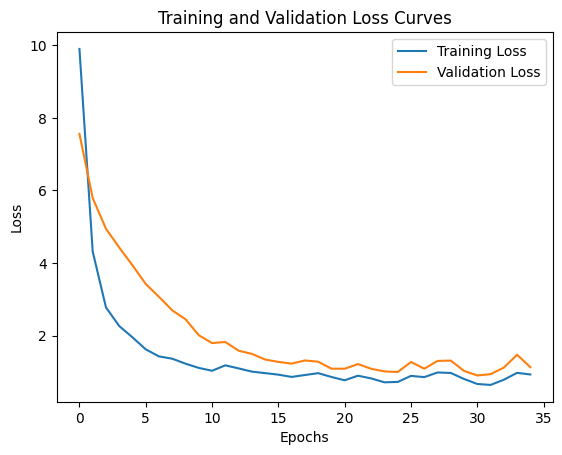

In [106]:
loss_values = history.history['loss']
val_loss_values = history.history['val_loss']

# Plot both training and validation loss curves
plt.plot(loss_values, label='Training Loss')
plt.plot(val_loss_values, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Curves')
plt.legend()
plt.show()

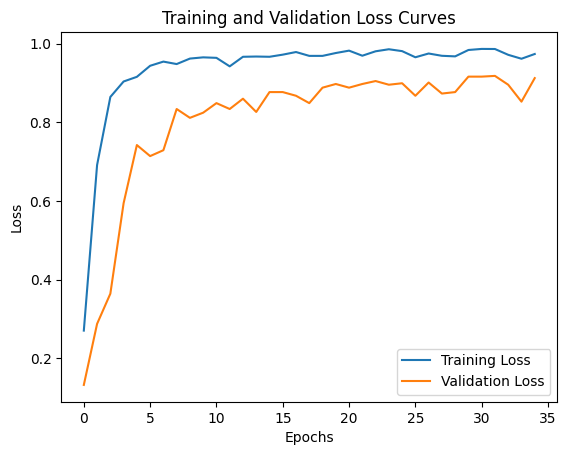

In [107]:
acc_values = history.history['accuracy']
val_acc_values = history.history['val_accuracy']

# Plot both training and validation loss curves
plt.plot(acc_values, label='Training Loss')
plt.plot(val_acc_values, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Curves')
plt.legend()
plt.show()

In [90]:
pred=model.predict(test_images)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


In [91]:
def check_pred(x):
    print("Predicted Value: ",end="")
    for i in range(5):
        n=np.argmax(pred[x][i])
        print(characters[n],end="")
    print("\nCaptcha given: ")
    plt.imshow(test_images[x])

Predicted Value: 655xe
Captcha given: 


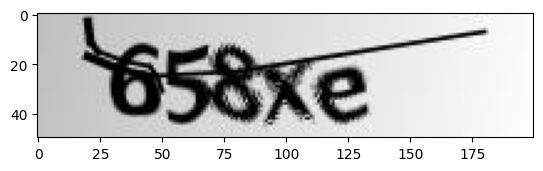

In [93]:
check_pred(1)

In [108]:
import pickle
pickle.dump(model,open('captcha_recog.p','wb'))

AttributeError: Can't pickle local object 'Layer._initializer_tracker.<locals>.<lambda>'